In [1]:
import numpy as np
import multiverse_python as mp

# Load snapshot data

In [2]:
cosmology = "lcdm"
snapNum = 10
lmin = 7
lmax = 14

basePath = f"/data2/gilee/Multiverse/lmin{lmin:02d}/{cosmology.upper()}"

In [3]:
data = mp.snapshot.loadDataAll(cosmology, basePath, snapNum)


[Load Data]

[Load Info]
  Found info: /data2/gilee/Multiverse/lmin07/LCDM/output_00010/info_00010.txt
  Original keys in info: dict_keys(['ncpu', 'ndim', 'levelmin', 'levelmax', 'ngridmax', 'nstep_coarse', 'boxlen', 'time', 'aexp', 'H0', 'omega_m', 'omega_l', 'omega_k', 'omega_b', 'unit_l', 'unit_d', 'unit_t', 'ordering type'])
  Updated keys in info: ['unit_t', 'unit_m', 'Lbox_cMpc', 'Lbox_pMpc']
  Found data: /data2/gilee/Multiverse/lmin07/LCDM/output_00010/part_00010.out00001
  Found data: /data2/gilee/Multiverse/lmin07/LCDM/output_00010/part_00010.out00002
  Found data: /data2/gilee/Multiverse/lmin07/LCDM/output_00010/part_00010.out00003
  Found data: /data2/gilee/Multiverse/lmin07/LCDM/output_00010/part_00010.out00004
  Found data: /data2/gilee/Multiverse/lmin07/LCDM/output_00010/part_00010.out00005
  Found data: /data2/gilee/Multiverse/lmin07/LCDM/output_00010/part_00010.out00006
  Found data: /data2/gilee/Multiverse/lmin07/LCDM/output_00010/part_00010.out00007
  Found data: /d

In [4]:
data

{'header': {'ncpu': 32,
  'ndim': 3,
  'levelmin': 7,
  'levelmax': 14,
  'ngridmax': 625000,
  'nstep_coarse': 100,
  'boxlen': 1.0,
  'time': -7.54352847314043,
  'aexp': 0.104867885545952,
  'H0': 72.0,
  'omega_m': 0.259999990463257,
  'omega_l': 0.740000009536743,
  'omega_k': 0.0,
  'omega_b': 0.0469999983906746,
  'unit_l': 5.29191899665009e+24,
  'unit_d': 2.19719519177753e-27,
  'unit_t': 4.285728333333333e+17,
  'ordering type': 'hilbert',
  'unit_m': 3.25617849280499e+47,
  'Lbox_cMpc': 16.384,
  'Lbox_pMpc': 1.7149681276299629,
  'cosmology': 'lcdm',
  'snapNum': 10},
 'npart': array([52592, 60561, 28304, 44268, 81522, 59419, 50451, 53290, 63833,
        75187, 84525, 68013, 80601, 85480, 86360, 74652, 56751, 63723,
        87383, 64685, 83052, 74432, 54120, 54433, 84512, 55797, 48164,
        70039, 53011, 73098, 86546, 45893]),
 'ids': array([      1,       6,       7, ..., 2045194, 1113439, 2045994]),
 'positions': array([[3.38277955e-03, 2.89439838e-02, 4.46813111e-04],

<IPython.core.display.Javascript object>


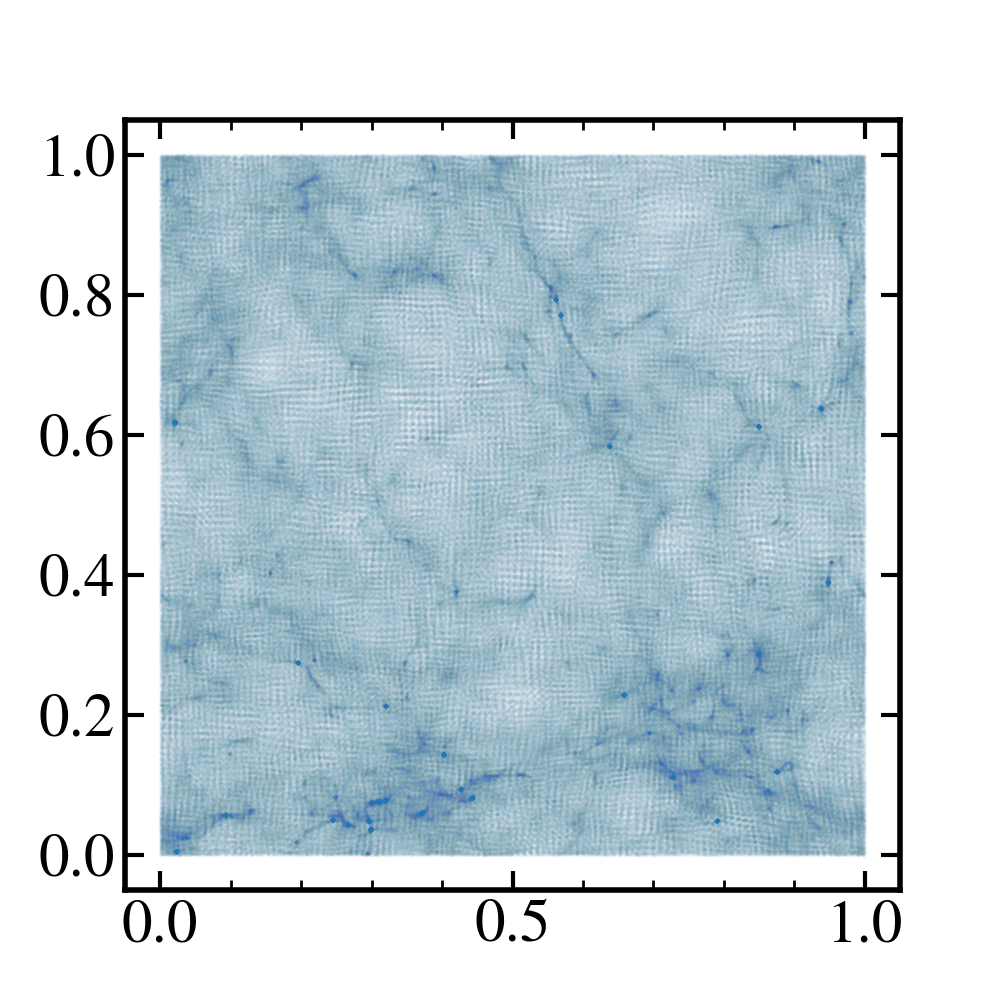

In [5]:
plt.figure(figsize=(5, 5))
plt.scatter(data['positions'][:,0], data['positions'][:,1], s=0.1, alpha=0.01)

# CSFR

In [6]:
z, csfr = mp.processing.computeCSFR(data)


[Load Time Table]
  cosmology: lcdm
  (w0, wa) = (-1.0, 0.0)
  Found time table: /md/gilee/cosmos-in-us/multiverse_python/table/time_table/time_table_cpl-1.0+0.0.csv

Returns z, csfr


In [7]:
def get_csfr_behroozi(file_path):
    
    import pandas as pd
    
    """
    Plots the cosmic star formation rate density from Behroozi et al. (2013).
    """
    # Read the data
    behroozi = pd.read_csv(file_path, 
                           names=['z', 'log10_csfr', 'err+', 'err-'], 
                           skiprows=3, delim_whitespace=True)
    
    return behroozi

In [8]:
behroozi = get_csfr_behroozi("/md/gilee/cosmos-in-us/Multiverse-utils/notebooks/read_particle/behroozi/behroozi-2013-data-compilation/csfrs_new.dat")
a_refine = [0.8, 0.4, 0.2, 0.1, 0.05, 0.025, 0.0125]
a_refine = np.array(a_refine)
z_refine = 1/a_refine - 1

<IPython.core.display.Javascript object>


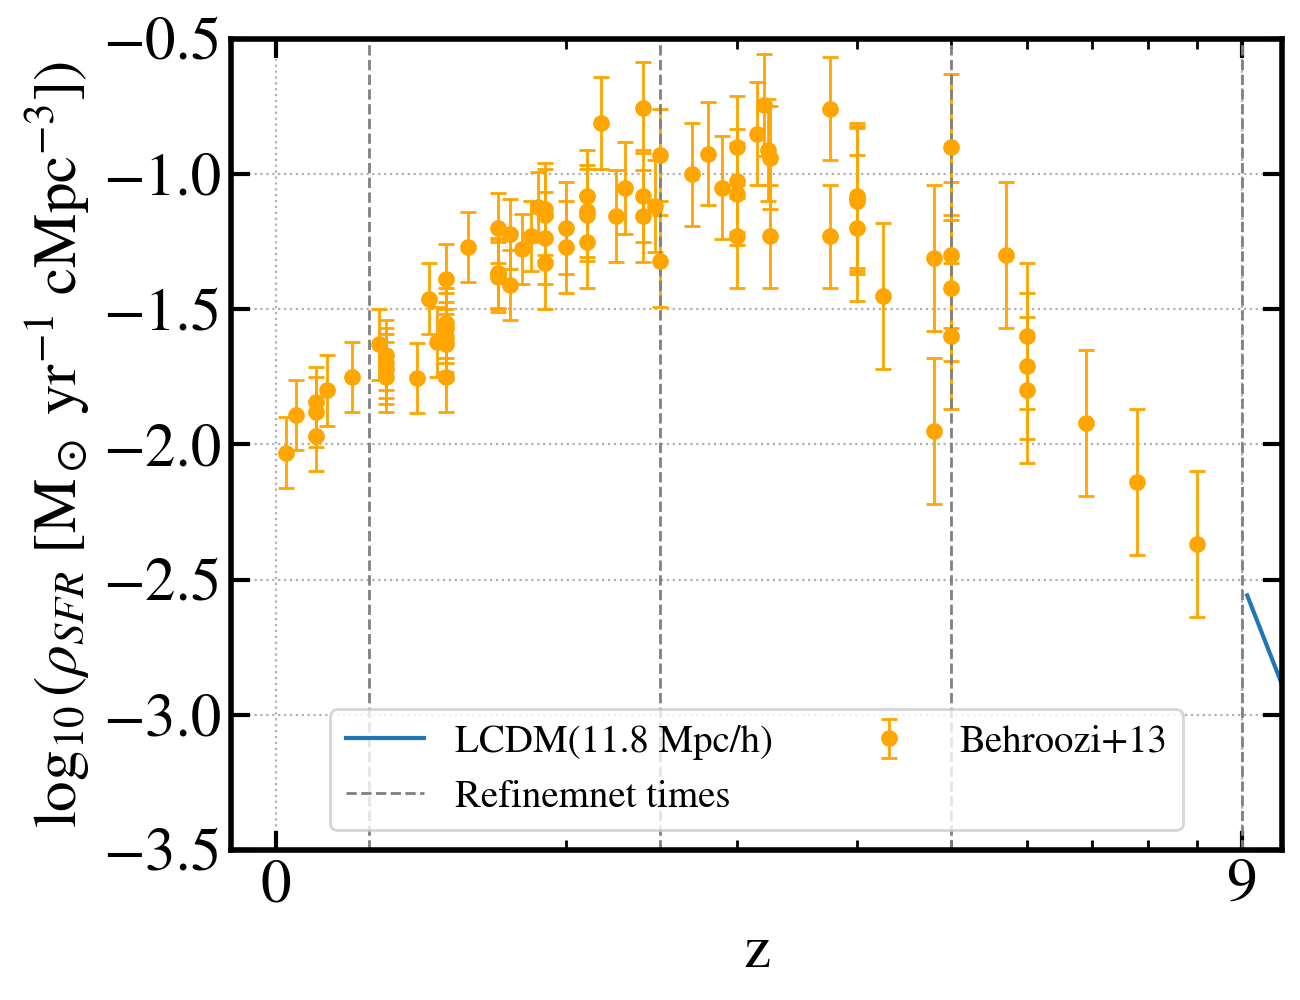

/tmp/ipykernel_3908372/2399302401.py:16: RuntimeWarning: divide by zero encountered in log10
  plt.plot(z + 1, np.log10(csfr), label="LCDM(11.8 Mpc/h)")


In [9]:
plt.figure(figsize=(6.5, 5))

# Observational results
plt.errorbar(
    behroozi['z']+1,
    behroozi['log10_csfr'],
    yerr=[behroozi['err-'], behroozi['err+']],
    fmt='o', c='orange',
    capsize=3,
    elinewidth=1,
    ms=5,
    label="Behroozi+13"
)

# # Simulation results
plt.plot(z + 1, np.log10(csfr), label="LCDM(11.8 Mpc/h)")
# plt.plot(csfr_lcdm_l08[0] + 1, np.log10(csfr_lcdm_l08[1]), label="LCDM(23.6 Mpc/h)")
# plt.plot(csfr_lcdm_l09[0] + 1, np.log10(csfr_lcdm_l09[1]), label="LCDM(47.2 Mpc/h)")

# Refinement times
plt.axvline([0], ls="--", c='gray', lw=1, label="Refinemnet times")
for z_ref in z_refine:
    plt.axvline(z_ref+1, ls="--", c='gray', lw=1)

plt.xscale('log')
plt.xlim(0.9, 11)
plt.ylim(-3.5, -0.5)

# Set custom ticks and labels
ticks = [1, 10]  # Positions for 10^0 and 10^1
labels = ['0', '9']  # Custom labels
plt.xticks(ticks, labels)

plt.legend(fontsize=14, ncols=2, frameon=True, loc="lower center")

plt.grid(ls=":")
plt.xlabel("z")
plt.ylabel(r"$\log_{10}(\rho_{SFR}$ [M$_\odot$ yr$^{-1}$ cMpc$^{-3}$])")
plt.tight_layout(pad=0.3)

# Overdensity

In [10]:
mp.processing.saveOverdensity(data)


[Compute overdensity map]
  Boxsize: 1.71 pMpc
  Boxsize: 16.38 cMpc
  levelmin: 7
  Grid size: 128
  dxini: 0.128000 cMpc
  dxini: 0.013398 pMpc
header:  {'n1': 128, 'n2': 128, 'n3': 128, 'dxini0': 0.128, 'xoff10': 0.0, 'xoff20': 0.0, 'xoff30': 0.0, 'astart0': 0.004975124378109453, 'omega_m0': 0.259999990463257, 'omega_l0': 0.740000009536743, 'h00': 0.72}
overdensity:  (128, 128, 128)
block size for header:  44
Writing header ... successfully done!
Writing slice 1/128, block size: 65536
Writing slice 2/128, block size: 65536
Writing slice 3/128, block size: 65536
Writing slice 4/128, block size: 65536
Writing slice 5/128, block size: 65536
Writing slice 6/128, block size: 65536
Writing slice 7/128, block size: 65536
Writing slice 8/128, block size: 65536
Writing slice 9/128, block size: 65536
Writing slice 10/128, block size: 65536
Writing slice 11/128, block size: 65536
Writing slice 12/128, block size: 65536
Writing slice 13/128, block size: 65536
Writing slice 14/128, block size: 

In [11]:
!tree

.
├── check_csfr.ipynb
├── deltac_cpl0_lmin07_00150
├── deltac_cpl1_lmin07_00150
├── deltac_lcdm-C04_lmin07_00150
├── deltac_lcdm_lmin07_00001
├── deltac_lcdm_lmin07_00010
├── deltac_lcdm_lmin07_00150
├── ps
│   ├── deltab_lcdm_lmin07_00000
│   ├── deltab_lcdm_lmin08_00000
│   ├── deltac_lcdm_lmin07_00001
│   ├── deltac_lcdm_lmin07_00150
│   ├── meshcorr.mod1.exe
│   ├── mode.psb_lcdm_lmin07_00000.out
│   ├── mode.psc_lcdm_lmin07_00001.out
│   ├── mode.psc_lcdm_lmin07_00150.out
│   ├── psb_lcdm_lmin07_00000.out
│   ├── psc_lcdm_lmin07_00001.out
│   ├── psc_lcdm_lmin07_00010.out
│   ├── psc_lcdm_lmin07_00150.out
│   └── test_ps.ipynb
└── test.ipynb

1 directory, 21 files


In [12]:
# header, delta = mp.processing.readOverdensity(f"./deltab_{cosmology}_lmin{lmin:02d}_{snapNum:05d}")
header, delta = mp.processing.readOverdensity(f"./deltac_{cosmology}_lmin{lmin:02d}_{snapNum:05d}")
offset = 1 + 1e-01
delta += offset

Block size for header:  44
Header successfully read!
Data successfully read!


In [13]:
data['header']

{'ncpu': 32,
 'ndim': 3,
 'levelmin': 7,
 'levelmax': 14,
 'ngridmax': 625000,
 'nstep_coarse': 100,
 'boxlen': 1.0,
 'time': -7.54352847314043,
 'aexp': 0.104867885545952,
 'H0': 72.0,
 'omega_m': 0.259999990463257,
 'omega_l': 0.740000009536743,
 'omega_k': 0.0,
 'omega_b': 0.0469999983906746,
 'unit_l': 5.29191899665009e+24,
 'unit_d': 2.19719519177753e-27,
 'unit_t': 4.285728333333333e+17,
 'ordering type': 'hilbert',
 'unit_m': 3.25617849280499e+47,
 'cosmology': 'lcdm',
 'snapNum': 10}

a =  0.10467334763366472
z =  8.553530316999082


<IPython.core.display.Javascript object>


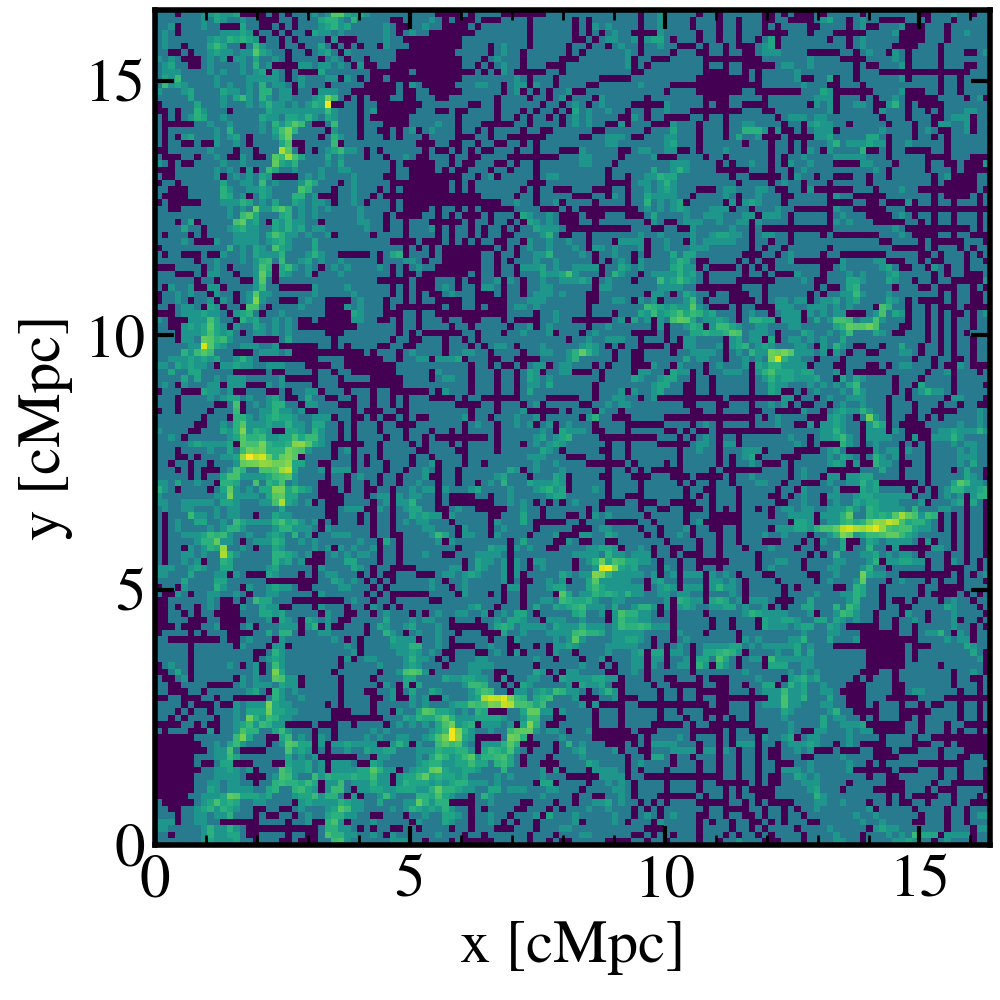

In [18]:
import matplotlib as mpl

Lbox_pMpc = data['header']['unit_l'] * mp.const.cm_to_Mpc
Lbox_cMpc = 2**lmax * mp.const.dx_fin_kpc / 1000
a = Lbox_pMpc / Lbox_cMpc
print("a = ", a)
print("z = ", 1/a - 1)

plt.figure(figsize=(5, 5))
plt.imshow(delta[:,:,0], 
           extent=[0, Lbox_cMpc, 0, Lbox_cMpc],
           origin="lower", 
           norm=mpl.colors.LogNorm())
plt.axis('equal')
plt.xlabel("x [cMpc]")
plt.ylabel("y [cMpc]")
plt.subplots_adjust(bottom=0.155, left=0.155, top=0.99, right=0.99)